In [2]:
import tensorflow as tf
import tensorflow.keras as kr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import backend
from tensorflow.keras.constraints import min_max_norm
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping
import os as os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [3]:
# Function to initialize GPU
def prep_gpu():
    phy_gpus = tf.config.list_physical_devices(device_type='GPU')

    for gpu in phy_gpus:
        tf.config.experimental.set_memory_growth(device=gpu, enable=True)

    log_gpus = tf.config.list_logical_devices(device_type='GPU')
    phy_cpus = tf.config.list_physical_devices(device_type='CPU')
    log_cpus = tf.config.list_logical_devices(device_type='CPU')

    print("Physical GPUs: {}\tLogical GPUs: {}\nPhysical CPUs: {}\tLogical CPUs: {}".format(len(phy_gpus),
                                                                                             len(log_gpus),
                                                                                             len(phy_cpus),
                                                                                             len(log_cpus)))

In [4]:
df = pd.read_csv(filepath_or_buffer='./DATA/cancer_classification.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


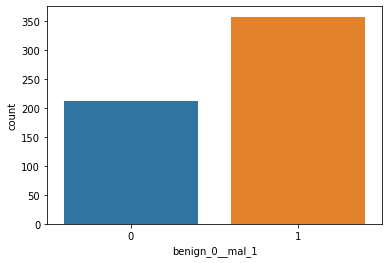

In [7]:
sns.countplot(x=df['benign_0__mal_1'])

In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

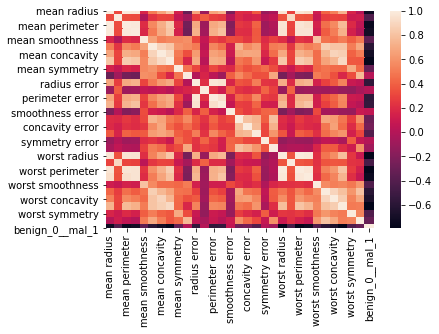

In [9]:
sns.heatmap(df.corr())

In [10]:
# Separating features from labels
label_col = ['benign_0__mal_1']
features = list(set(list(df.columns.values)).difference(label_col))
X = df[features]
y = df[label_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

print("Number of features: {}".format(len(features)))
print("Number of training records: {}".format(len(X_train)))

Number of features: 30
Number of training records: 426


In [11]:
# Normalizing input features
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
prep_gpu()

Physical GPUs: 0	Logical GPUs: 0
Physical CPUs: 1	Logical CPUs: 1


In [13]:
# Define model
backend.clear_session()

model = Sequential()

model.add(Input(shape=(30,)))
model.add(layer=Dense(30, activation='relu'))
model.add(layer=Dense(15, activation='relu'))
model.add(layer=Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Fit the model
model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_test, y_test), verbose=1)

Epoch 1/500
14/14 [==============================] - 0s 27ms/step - loss: 0.7043 - val_loss: 0.6788
Epoch 2/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6637 - val_loss: 0.6428
Epoch 3/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6287 - val_loss: 0.6050
Epoch 4/500
14/14 [==============================] - 0s 5ms/step - loss: 0.5861 - val_loss: 0.5569
Epoch 5/500
14/14 [==============================] - 0s 5ms/step - loss: 0.5337 - val_loss: 0.4963
Epoch 6/500
14/14 [==============================] - 0s 5ms/step - loss: 0.4761 - val_loss: 0.4415
Epoch 7/500
14/14 [==============================] - 0s 5ms/step - loss: 0.4254 - val_loss: 0.3890
Epoch 8/500
14/14 [==============================] - 0s 5ms/step - loss: 0.3804 - val_loss: 0.3452
Epoch 9/500
14/14 [==============================] - 0s 5ms/step - loss: 0.3449 - val_loss: 0.3097
Epoch 10/500
14/14 [==============================] - 0s 5ms/step - loss: 0.3123 - val_loss: 0.2836
Epoch 11

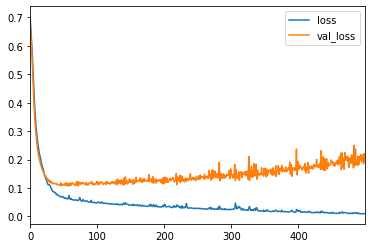

In [15]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [16]:
# Build model with early stopping callback
# Define model
backend.clear_session()

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)

model = Sequential()

model.add(Input(shape=(30,)))
model.add(layer=Dense(30, activation='relu'))
model.add(layer=Dense(15, activation='relu'))
model.add(layer=Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Fit model with early stopping
model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

Epoch 1/500
14/14 [==============================] - 0s 18ms/step - loss: 0.6689 - val_loss: 0.6487
Epoch 2/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6228 - val_loss: 0.6044
Epoch 3/500
14/14 [==============================] - 0s 5ms/step - loss: 0.5768 - val_loss: 0.5580
Epoch 4/500
14/14 [==============================] - 0s 5ms/step - loss: 0.5339 - val_loss: 0.5145
Epoch 5/500
14/14 [==============================] - 0s 5ms/step - loss: 0.4903 - val_loss: 0.4705
Epoch 6/500
14/14 [==============================] - 0s 5ms/step - loss: 0.4490 - val_loss: 0.4265
Epoch 7/500
14/14 [==============================] - 0s 5ms/step - loss: 0.4103 - val_loss: 0.3862
Epoch 8/500
14/14 [==============================] - 0s 5ms/step - loss: 0.3744 - val_loss: 0.3510
Epoch 9/500
14/14 [==============================] - 0s 6ms/step - loss: 0.3402 - val_loss: 0.3160
Epoch 10/500
14/14 [==============================] - 0s 5ms/step - loss: 0.3106 - val_loss: 0.2873
Epoch 11

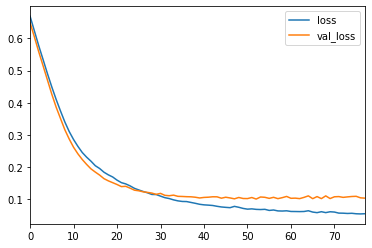

In [18]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
# Predict with data and check performance
y_pred = model.predict(X_test) > 0.5
print(classification_report(y_true=np.array(y_test), y_pred=y_pred))
print("\n")
print(confusion_matrix(y_true=np.array(y_test), y_pred=y_pred))

In [19]:
# Build model with dropout layers
# Define model
backend.clear_session()

model = Sequential()

model.add(Input(shape=(30,)))
model.add(layer=Dense(30, activation='relu'))
model.add(layer=Dropout(0.5))
model.add(layer=Dense(15, activation='relu'))
model.add(layer=Dropout(0.5))
model.add(layer=Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Fit model with dropout layers
model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_test, y_test), verbose=1)

Epoch 1/500
14/14 [==============================] - 0s 14ms/step - loss: 0.7104 - val_loss: 0.6730
Epoch 2/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6920 - val_loss: 0.6483
Epoch 3/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6447 - val_loss: 0.6197
Epoch 4/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6200 - val_loss: 0.5903
Epoch 5/500
14/14 [==============================] - 0s 4ms/step - loss: 0.5933 - val_loss: 0.5594
Epoch 6/500
14/14 [==============================] - 0s 4ms/step - loss: 0.5871 - val_loss: 0.5271
Epoch 7/500
14/14 [==============================] - 0s 4ms/step - loss: 0.5330 - val_loss: 0.4894
Epoch 8/500
14/14 [==============================] - 0s 5ms/step - loss: 0.5073 - val_loss: 0.4551
Epoch 9/500
14/14 [==============================] - 0s 4ms/step - loss: 0.5130 - val_loss: 0.4243
Epoch 10/500
14/14 [==============================] - 0s 4ms/step - loss: 0.4998 - val_loss: 0.4011
Epoch 11

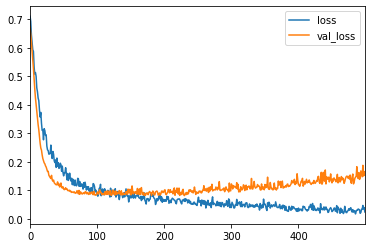

In [21]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [22]:
# Build model with dropout layers and early stopping
# Define model
backend.clear_session()

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)

model = Sequential()

model.add(Input(shape=(30,)))
model.add(layer=Dense(30, activation='relu'))
model.add(layer=Dropout(0.5))
model.add(layer=Dense(15, activation='relu'))
model.add(layer=Dropout(0.5))
model.add(layer=Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Fit model with dropout layers
model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

Epoch 1/500
14/14 [==============================] - 0s 14ms/step - loss: 0.7151 - val_loss: 0.6885
Epoch 2/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6931 - val_loss: 0.6669
Epoch 3/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6653 - val_loss: 0.6525
Epoch 4/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6460 - val_loss: 0.6352
Epoch 5/500
14/14 [==============================] - 0s 7ms/step - loss: 0.6308 - val_loss: 0.6103
Epoch 6/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6107 - val_loss: 0.5779
Epoch 7/500
14/14 [==============================] - 0s 4ms/step - loss: 0.5944 - val_loss: 0.5470
Epoch 8/500
14/14 [==============================] - 0s 5ms/step - loss: 0.5670 - val_loss: 0.5169
Epoch 9/500
14/14 [==============================] - 0s 5ms/step - loss: 0.5419 - val_loss: 0.4833
Epoch 10/500
14/14 [==============================] - 0s 5ms/step - loss: 0.5232 - val_loss: 0.4510
Epoch 11

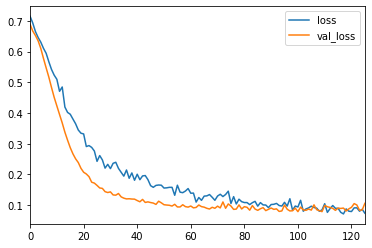

In [24]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [25]:
# Predict with data and check performance
y_pred = model.predict(X_test) > 0.5
print(classification_report(y_true=np.array(y_test), y_pred=y_pred))
print("\n")
print(confusion_matrix(y_true=np.array(y_test), y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.99      0.94      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



[[54  1]
 [ 5 83]]
